IMPORTING LIBRARIES AND CSV

In [75]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('C:/Users/lijaz/Desktop/DATA/stack/survey_results_public.csv')

C:\Users\lijaz\AppData\Local\Temp\ipykernel_19572\1207369010.py:6: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/lijaz/Desktop/DATA/stack/survey_results_public.csv')


In [76]:

columns = list()
columns = df.columns.tolist()
colums = columns.sort()
print(columns)

['AIDangerous', 'AIFuture', 'AIInteresting', 'AIResponsible', 'AdBlocker', 'AdBlockerDisable', 'AdBlockerReasons', 'AdsActions', 'AdsAgreeDisagree1', 'AdsAgreeDisagree2', 'AdsAgreeDisagree3', 'AdsPriorities1', 'AdsPriorities2', 'AdsPriorities3', 'AdsPriorities4', 'AdsPriorities5', 'AdsPriorities6', 'AdsPriorities7', 'Age', 'AgreeDisagree1', 'AgreeDisagree2', 'AgreeDisagree3', 'AssessBenefits1', 'AssessBenefits10', 'AssessBenefits11', 'AssessBenefits2', 'AssessBenefits3', 'AssessBenefits4', 'AssessBenefits5', 'AssessBenefits6', 'AssessBenefits7', 'AssessBenefits8', 'AssessBenefits9', 'AssessJob1', 'AssessJob10', 'AssessJob2', 'AssessJob3', 'AssessJob4', 'AssessJob5', 'AssessJob6', 'AssessJob7', 'AssessJob8', 'AssessJob9', 'CareerSatisfaction', 'CheckInCode', 'CommunicationTools', 'CompanySize', 'ConvertedSalary', 'Country', 'Currency', 'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith', 'Dependents', 'DevType', 'EducationParents', 'EducationTypes', 'Employment', 'Ergonomic

Shape

In [77]:
df.shape

(98855, 129)

Question : Are You more likely to get a job as a devoloper if you have a masters degree?

SELECTING THE NEEDED COLUMNS

In [78]:
needed = ['Employment','FormalEducation','DevType']
gf = df[needed]
gf.head()

,Employment,FormalEducation,DevType
0,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Full-stack developer
1,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Database administrator;DevOps specialist;Full-stack developer;System administrator
2,Employed full-time,Associate degree,Engineering manager;Full-stack developer
3,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Full-stack developer
4,Employed full-time,Some college/university study without earning a degree,Data or business analyst;Desktop or enterprise applications developer;Game or graphics developer;QA or test developer;Student


Filtering out unemployed and nan.

In [79]:
gf.shape

(98855, 3)

In [80]:
gf['Employment'].unique()

array(['Employed part-time', 'Employed full-time',
       'Independent contractor, freelancer, or self-employed',
       'Not employed, and not looking for work',
       'Not employed, but looking for work', nan, 'Retired'], dtype=object)

In [81]:
gf = gf[(gf['Employment'] == 'Employed part-time') | 
        (gf['Employment'] == 'Employed full-time') | 
        (gf['Employment'] == 'Independent contractor, freelancer, or self-employed')]

gf['Employment'].unique()

array(['Employed part-time', 'Employed full-time',
       'Independent contractor, freelancer, or self-employed'],
      dtype=object)

NOW WE HAVE TABLE OF ALL EMPLOYED PEOPLE.

NOW WE HAVE TO REMOVE null values

In [82]:
gf = gf.dropna(how='any')
gf.shape

(79841, 3)

Checking for null

In [83]:
gf.shape

(79841, 3)

Select Total number of Devolopers

In [84]:
total = gf['Employment'].count()
print(total)

79841


Select number of devolopers with masters degree

In [85]:
pattern = r'^mast'
af = gf[gf['FormalEducation'].str.contains(pattern, case=False, regex=True)]

af.head()

,Employment,FormalEducation,DevType
10,Employed full-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",Back-end developer;Database administrator;Mobile developer;System administrator
15,Employed full-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",Full-stack developer
17,Employed full-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",Back-end developer
24,Employed full-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",Mobile developer
25,Employed full-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",Full-stack developer


In [86]:
masters = af['Employment'].count()

Calculating Percantages

In [87]:
diff = total - masters
print(diff)

60324


In [88]:
percentage_total = (diff/total)*100
print(percentage_total)

75.55516589221078


In [89]:
percentage_masters = 100 - percentage_total
print(percentage_masters)

24.44483410778922


NOW PLOTTING A PIECHART

([<matplotlib.patches.Wedge at 0x2a0348f82e0>,
 [Text(0.7912644423687218, 0.764133877172656, 'With Masters'),
  Text(-0.7912644666578703, -0.7641338520211209, 'Without Masters')],
 [Text(0.4315987867465755, 0.41680029663963053, '24.4%'),
  Text(-0.43159879999520195, -0.4168002829206114, '75.6%')])

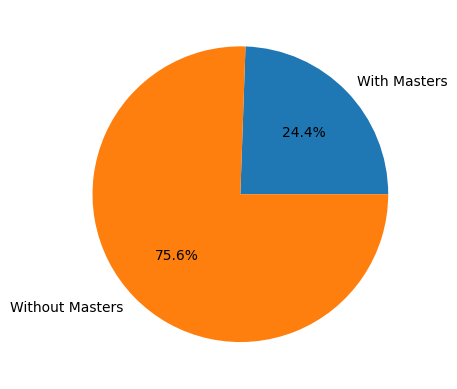

In [90]:
labels = ['With Masters','Without Masters']
values = [percentage_masters,percentage_total]

plt.pie(values,labels=labels, autopct='%1.1f%%')

NOW LETS CHECK IF PEOPLE WITH MASTERS EARN MORE GENERALLY

In [91]:
df = pd.read_csv('C:/Users/lijaz/Desktop/DATA/stack/survey_results_public.csv')
columns = list()
columns = df.columns.tolist()
colums = columns.sort()
print(columns)

C:\Users\lijaz\AppData\Local\Temp\ipykernel_19572\2071664910.py:1: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/lijaz/Desktop/DATA/stack/survey_results_public.csv')


['AIDangerous', 'AIFuture', 'AIInteresting', 'AIResponsible', 'AdBlocker', 'AdBlockerDisable', 'AdBlockerReasons', 'AdsActions', 'AdsAgreeDisagree1', 'AdsAgreeDisagree2', 'AdsAgreeDisagree3', 'AdsPriorities1', 'AdsPriorities2', 'AdsPriorities3', 'AdsPriorities4', 'AdsPriorities5', 'AdsPriorities6', 'AdsPriorities7', 'Age', 'AgreeDisagree1', 'AgreeDisagree2', 'AgreeDisagree3', 'AssessBenefits1', 'AssessBenefits10', 'AssessBenefits11', 'AssessBenefits2', 'AssessBenefits3', 'AssessBenefits4', 'AssessBenefits5', 'AssessBenefits6', 'AssessBenefits7', 'AssessBenefits8', 'AssessBenefits9', 'AssessJob1', 'AssessJob10', 'AssessJob2', 'AssessJob3', 'AssessJob4', 'AssessJob5', 'AssessJob6', 'AssessJob7', 'AssessJob8', 'AssessJob9', 'CareerSatisfaction', 'CheckInCode', 'CommunicationTools', 'CompanySize', 'ConvertedSalary', 'Country', 'Currency', 'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith', 'Dependents', 'DevType', 'EducationParents', 'EducationTypes', 'Employment', 'Ergonomic

SELECT NEEDED COLUMNS

In [92]:
needed = ['Employment','FormalEducation','DevType','ConvertedSalary']
gf = df[needed]
gf.head()

,Employment,FormalEducation,DevType,ConvertedSalary
0,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Full-stack developer,NaN
1,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Database administrator;DevOps specialist;Full-stack developer;System administrator,70841.0
2,Employed full-time,Associate degree,Engineering manager;Full-stack developer,NaN
3,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Full-stack developer,NaN
4,Employed full-time,Some college/university study without earning a degree,Data or business analyst;Desktop or enterprise applications developer;Game or graphics developer;QA or test developer;Student,21426.0


In [93]:
gf = gf.rename(columns={'ConvertedSalary':'Salary'})
gf.head()

,Employment,FormalEducation,DevType,Salary
0,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Full-stack developer,NaN
1,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Database administrator;DevOps specialist;Full-stack developer;System administrator,70841.0
2,Employed full-time,Associate degree,Engineering manager;Full-stack developer,NaN
3,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Full-stack developer,NaN
4,Employed full-time,Some college/university study without earning a degree,Data or business analyst;Desktop or enterprise applications developer;Game or graphics developer;QA or test developer;Student,21426.0


NOW CLEANING

In [94]:
gf = gf[(gf['Employment'] == 'Employed part-time') | 
        (gf['Employment'] == 'Employed full-time') | 
        (gf['Employment'] == 'Independent contractor, freelancer, or self-employed')]

In [95]:
gf = gf.dropna(how='any')
gf.shape

(44708, 4)

In [96]:
gf.head

<bound method NDFrame.head of                                                  Employment  \
1                                        Employed full-time   
4                                        Employed full-time   
5                                        Employed full-time   
6                                        Employed full-time   
8                                        Employed full-time   
...                                                     ...   
89839  Independent contractor, freelancer, or self-employed   
89888  Independent contractor, freelancer, or self-employed   
89898                                    Employed part-time   
89911                                    Employed part-time   
89960                                    Employed full-time   

                                                                          FormalEducation  \
1                                                Bachelor’s degree (BA, BS, B.Eng., etc.)   
4                          

In [97]:
mf = gf[gf['FormalEducation'] == 'Master’s degree (MA, MS, M.Eng., MBA, etc.)']
tf = gf[gf['FormalEducation'] != 'Master’s degree (MA, MS, M.Eng., MBA, etc.)']
mf = mf[mf['Salary']!=0]
tf = tf[tf['Salary']!=0]
mf.shape

(10813, 4)

In [98]:
tf.shape

(33701, 4)

NOW WE HAVE 2 DATA FRAMES, ONE WITH ALL MASTER DEVOLOPERS AND OTHER WITH ALL NON MASTERS.

CALCULATE AVERAGE SALARY OF BOTH

In [99]:
avg_master = mf['Salary'].sum()/10813
print(avg_master)

avg_non = tf['Salary'].sum()/33701
print(avg_non)

102076.5105891057
97489.16367466841


NOW calculate percentage dfference

In [100]:
perc = (avg_non/avg_master)*100
print(perc)

perc_2 = 100-perc
print(perc_2)

95.50597205178477
4.494027948215233


SO Masters degree earn 4.5% more

Question : Whats the most popular method of learning?

In [101]:

gf = df['EducationTypes']
gf.head()

0                                                                                                       Taught yourself a new language, framework, or tool without taking a formal course;Participated in a hackathon
1                                                                                               Taught yourself a new language, framework, or tool without taking a formal course;Contributed to open source software
2                                                                                                                                                                                                                 NaN
3                                                                           Completed an industry certification program (e.g. MCPD);Taught yourself a new language, framework, or tool without taking a formal course
4    Taken a part-time in-person course in programming or software development;Received on-the-job training in software development;Taught yours

In [102]:
gf.dropna(how='any')

0                                                                                                                  Taught yourself a new language, framework, or tool without taking a formal course;Participated in a hackathon
1                                                                                                          Taught yourself a new language, framework, or tool without taking a formal course;Contributed to open source software
3                                                                                      Completed an industry certification program (e.g. MCPD);Taught yourself a new language, framework, or tool without taking a formal course
4               Taken a part-time in-person course in programming or software development;Received on-the-job training in software development;Taught yourself a new language, framework, or tool without taking a formal course
5        Received on-the-job training in software development;Taught yourself a new language, framew

In [103]:
qf = df.groupby(['EducationTypes']).size().reset_index(name='Count')
pd.set_option('display.max_colwidth', None)
qf = qf.max()

qf.head()


EducationTypes    Taught yourself a new language, framework, or tool without taking a formal course;Participated in online coding competitions (e.g. HackerRank, CodeChef, TopCoder);Participated in a hackathon;Contributed to open source software
Count                                                                                                                                                                                                                                           6900
dtype: object

FOUND THE MOST POPULAR EDUCATION TYPE

In [104]:
needed = ['YearsCoding','ConvertedSalary','DevType']
new = df[needed]

In [105]:
new = new.dropna()

In [106]:
def exp(string):
    if isinstance(string,str):
        parts=string.split('or more')
        if len(parts)>1:
           return int(parts[0])
        else:
           range_parts=string.split('-')
           start=int(range_parts[0])
           end=int(range_parts[1].split()[0])
           return (start+end)/2
    else :
        return string
     

new['YearsCoding']=new['YearsCoding'].apply(exp)

IMPORT LIBRARIES